In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)

In [2]:
df_train = pd.read_csv('house_train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Preprocessing Part 1

In [3]:
check_missing = df_train.isnull().sum() * 100 / df_train.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [4]:
df_train.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], inplace=True)

In [5]:
#Check the Zero Value
df_train_copy = df_train.copy(deep = True) #deep = True -> Buat salinan indeks dan data dalam dataframe
df_train_copy[['BsmtFinSF2','MiscVal','3SsnPorch','ScreenPorch','PoolArea','LowQualFinSF','EnclosedPorch','WoodDeckSF']] = df_train_copy[['BsmtFinSF2','MiscVal','3SsnPorch','ScreenPorch','PoolArea','LowQualFinSF','EnclosedPorch','WoodDeckSF']].replace(0,np.NaN)

# Showing the Count of NANs
check_missing = df_train_copy.isnull().sum() * 100 / df_train_copy.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

PoolArea         99.520548
3SsnPorch        98.356164
LowQualFinSF     98.219178
MiscVal          96.438356
ScreenPorch      92.054795
BsmtFinSF2       88.561644
EnclosedPorch    85.753425
WoodDeckSF       52.123288
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
GarageType        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrType        0.547945
MasVnrArea        0.547945
Electrical        0.068493
dtype: float64

In [6]:
df_train.drop(columns=['PoolArea', '3SsnPorch', 'MiscVal', 'ScreenPorch', 'BsmtFinSF2','LowQualFinSF','EnclosedPorch','WoodDeckSF'], inplace=True)
df_train.shape

(1460, 68)

In [7]:
df_train.drop(columns=['Id'], inplace=True)
df_train.shape

(1460, 67)

# Exploratory Data Analysis

In [8]:
df_train.select_dtypes(include='object').nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

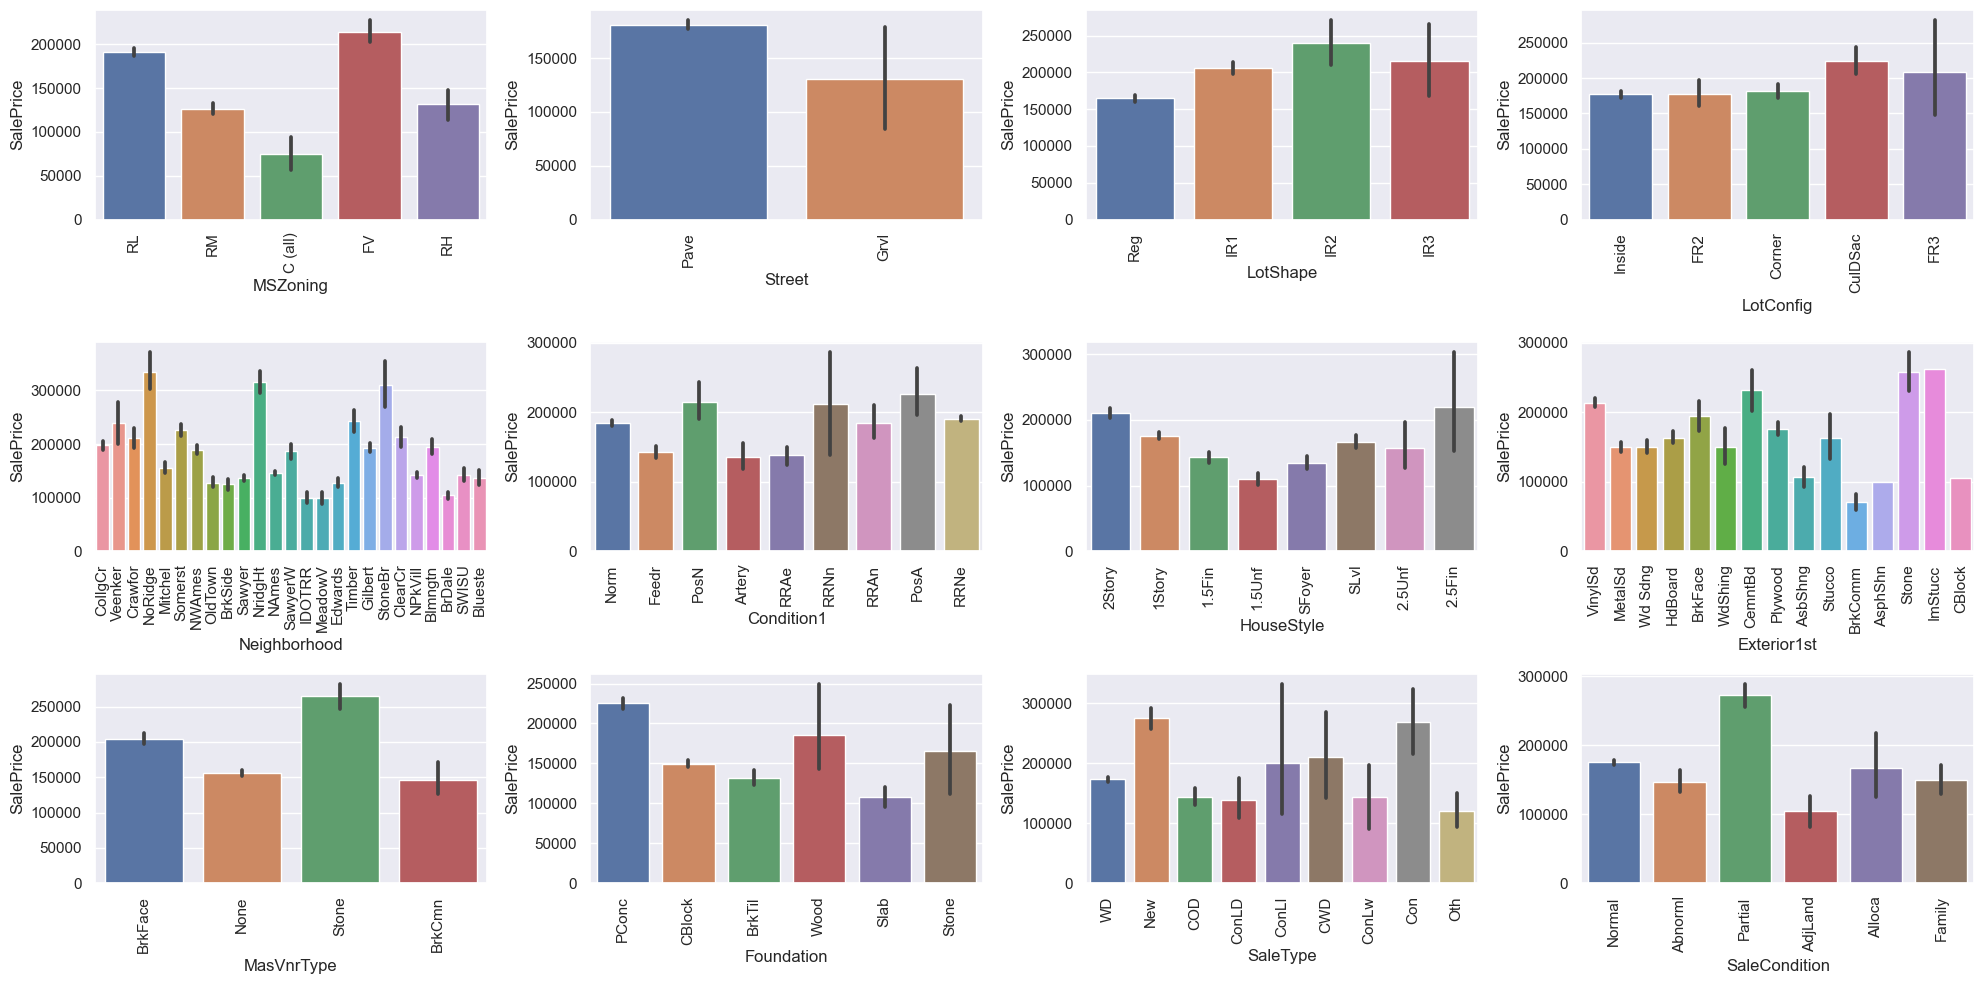

In [9]:
# list of categorical variables to plot
cat_vars = ['MSZoning', 'Street', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1', 'HouseStyle', 'Exterior1st', 'MasVnrType', 'Foundation', 'SaleType', 'SaleCondition']

# create figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='SalePrice', data=df_train, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

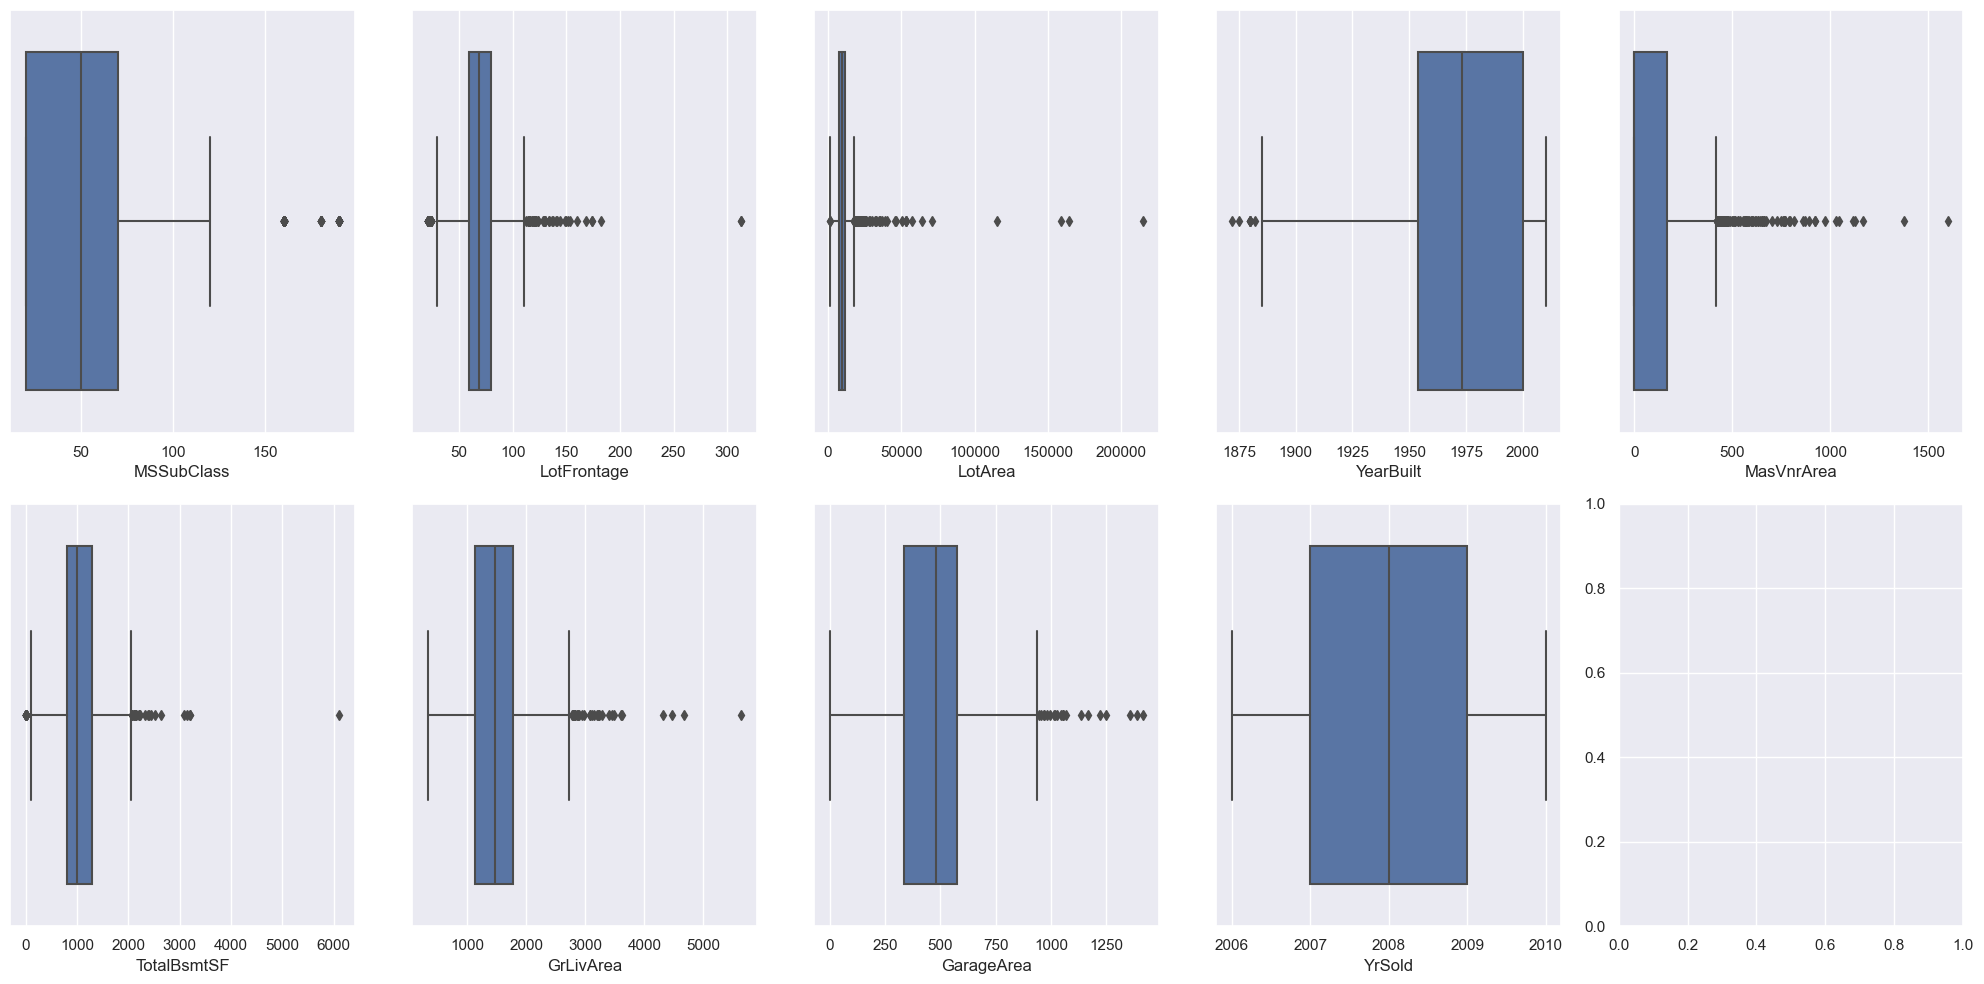

In [10]:
num_vars = ['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'YrSold']

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df_train, ax=axs[i])

fig.tight_layout()

plt.show()

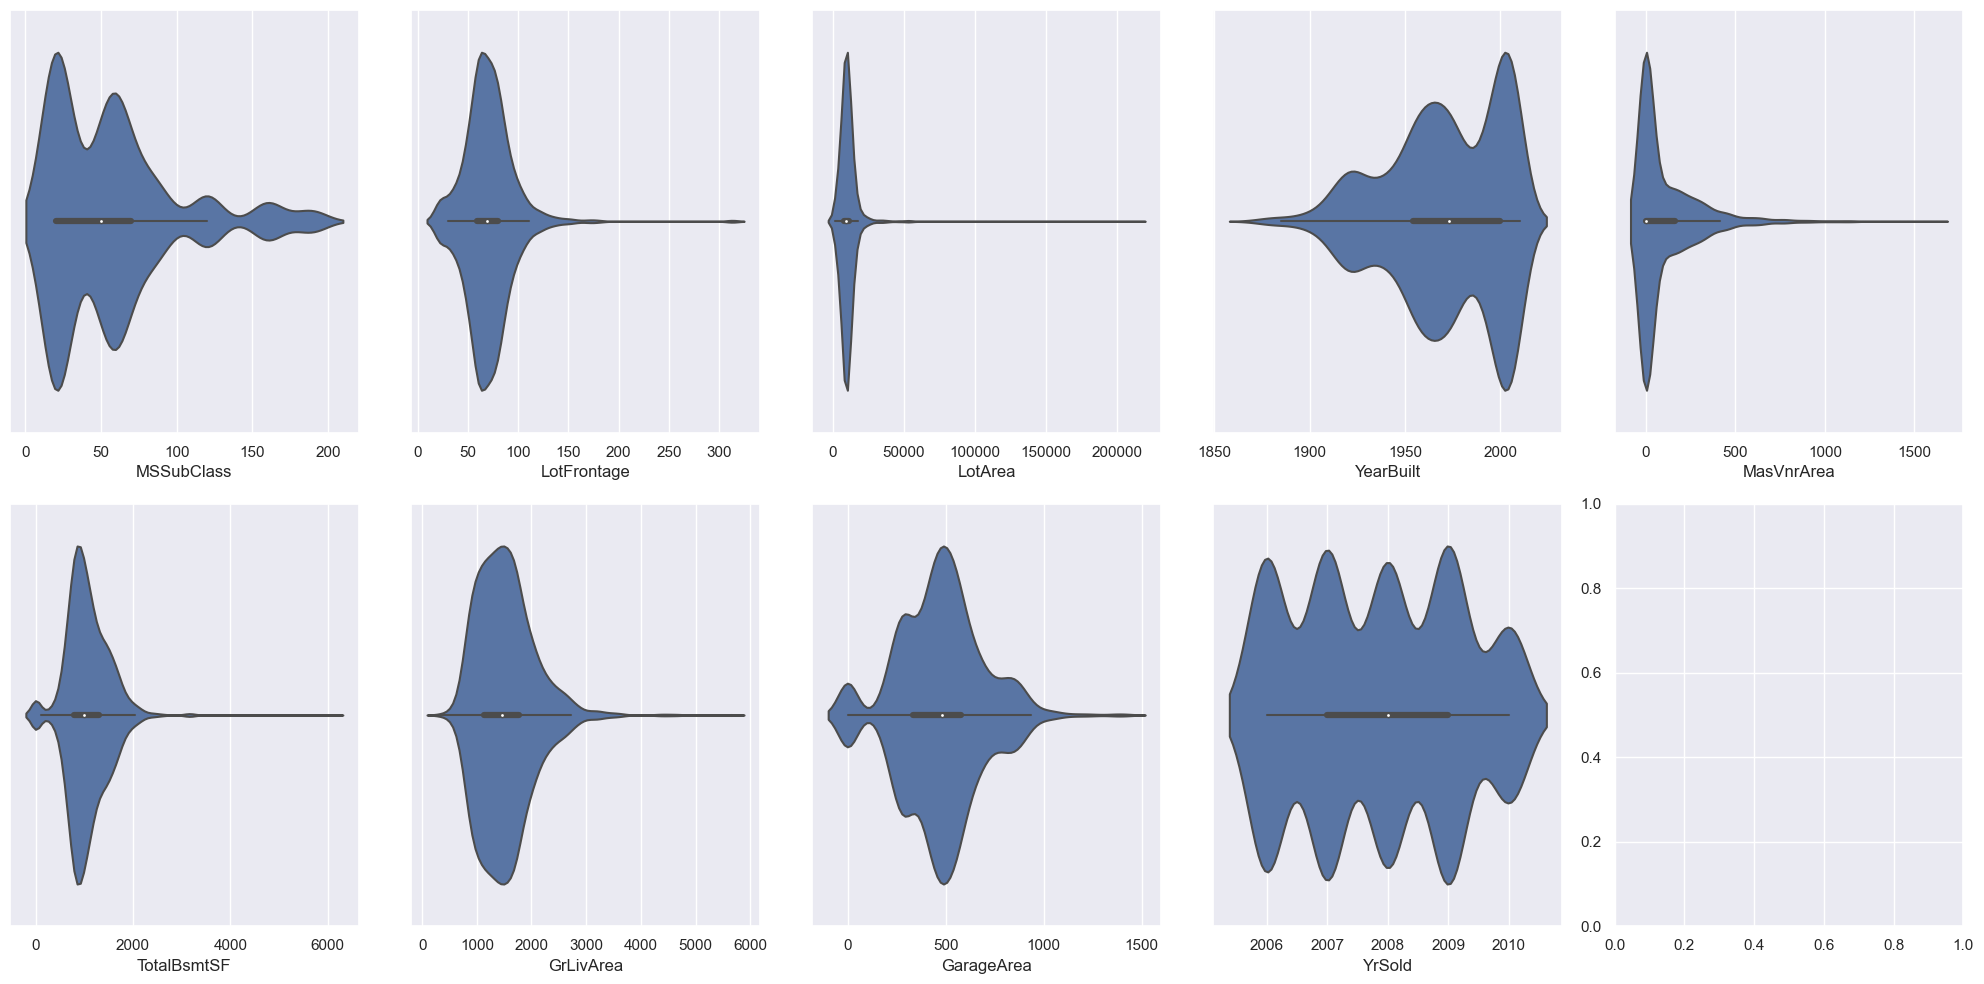

In [11]:
num_vars = ['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'YrSold']

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df_train, ax=axs[i])

fig.tight_layout()

plt.show()

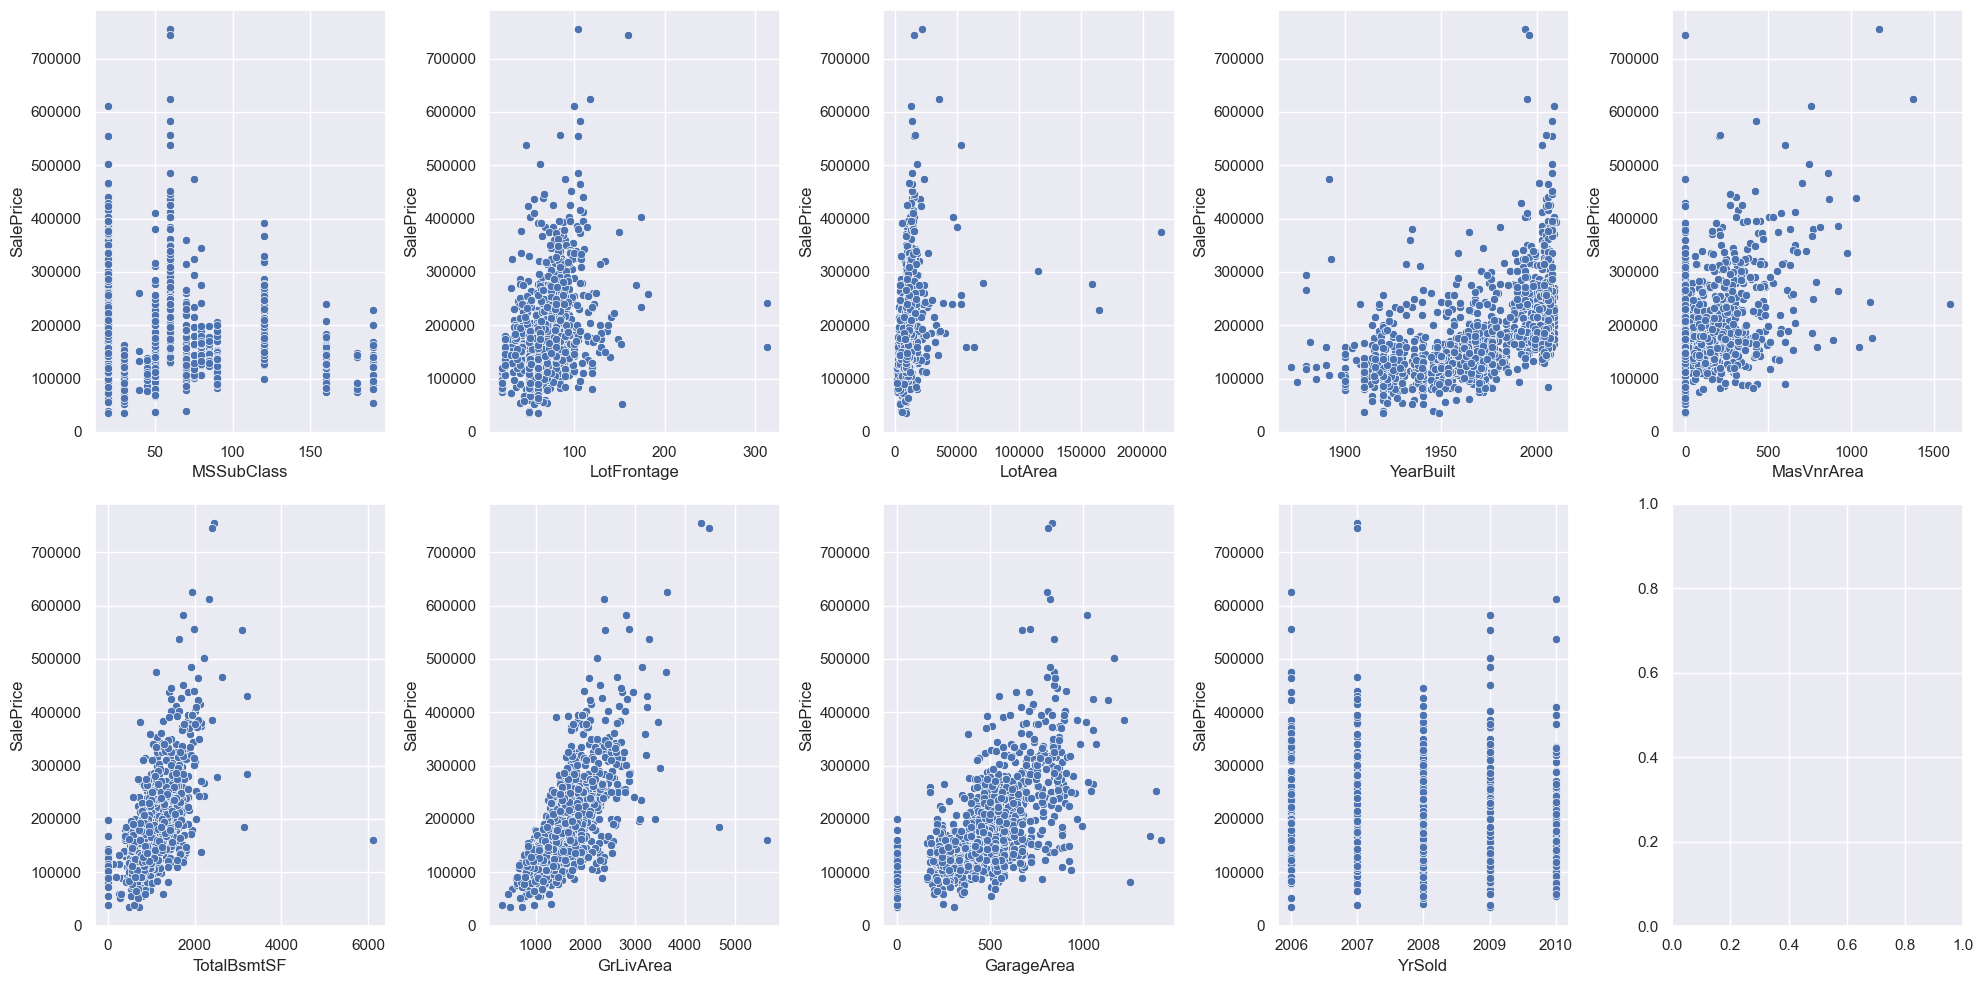

In [12]:
num_vars = ['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'YrSold']

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.scatterplot(x=var, y='SalePrice', data=df_train, ax=axs[i])

fig.tight_layout()

plt.show()

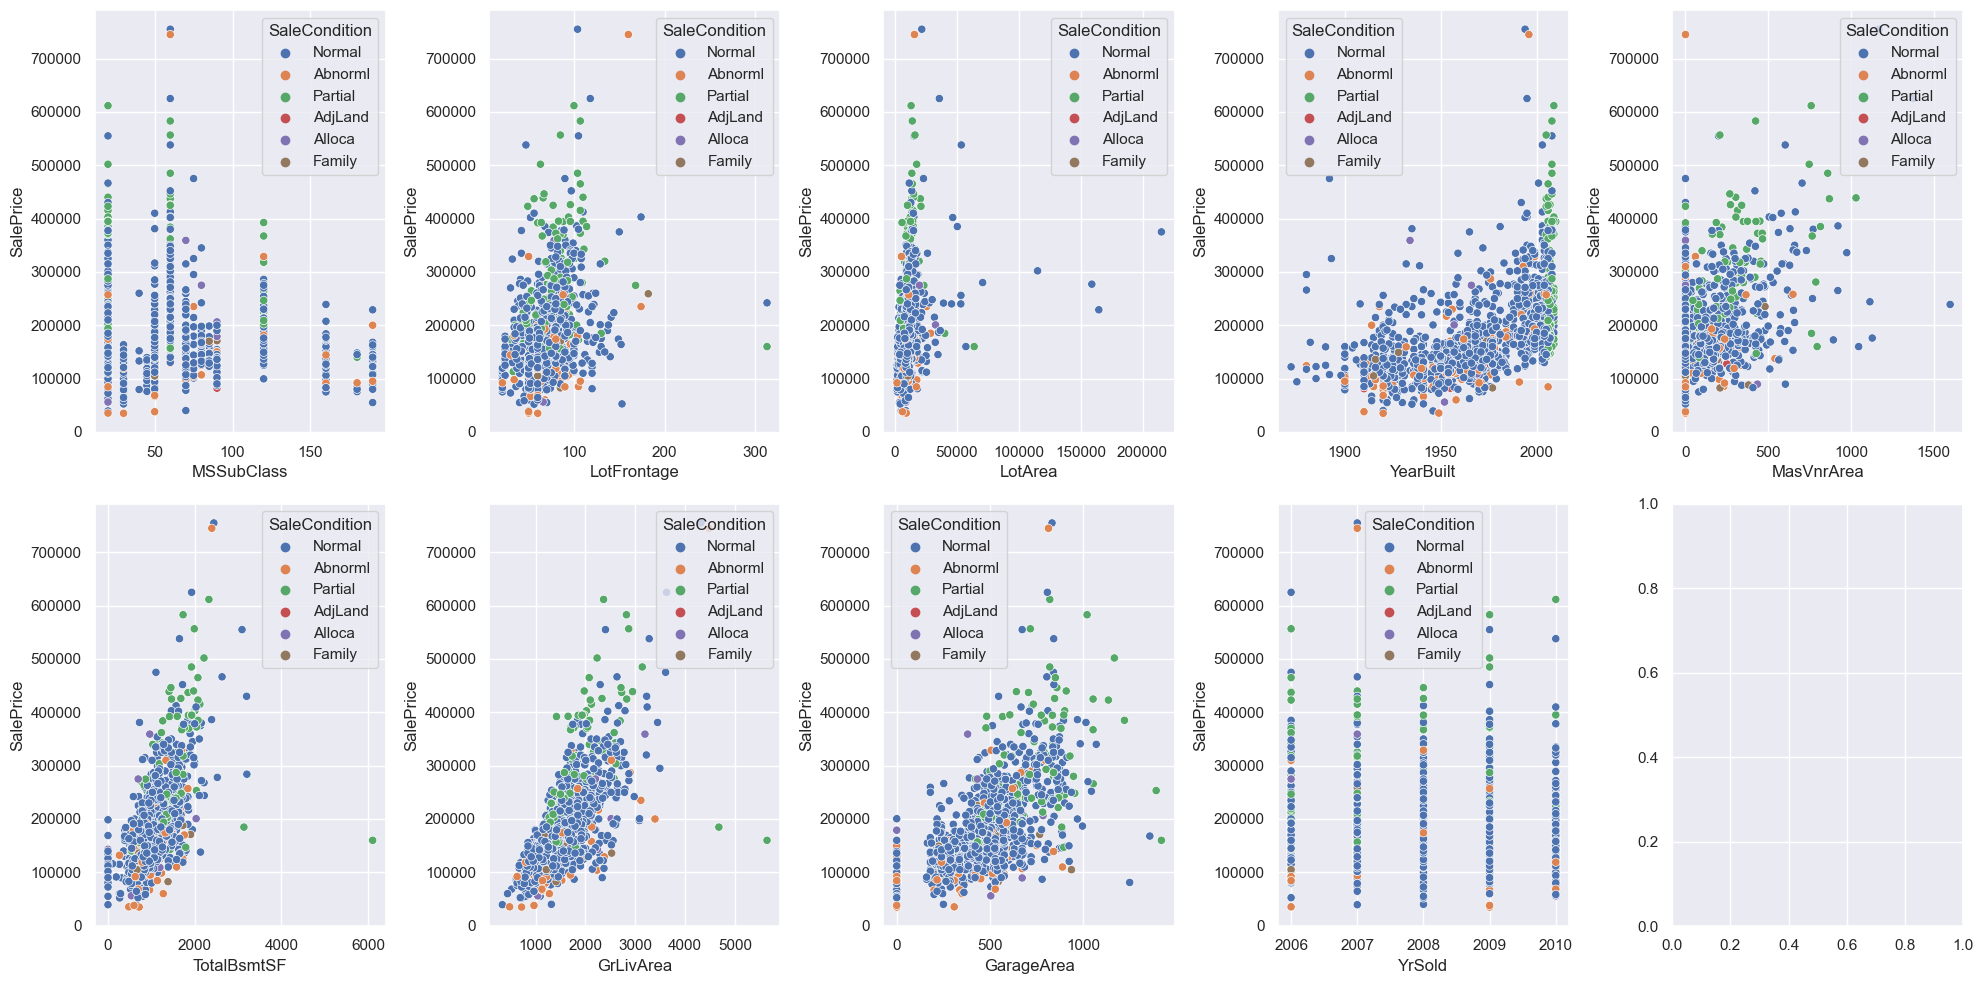

In [13]:
num_vars = ['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'YrSold']

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.scatterplot(x=var, y='SalePrice', hue='SaleCondition', data=df_train, ax=axs[i])

fig.tight_layout()

plt.show()

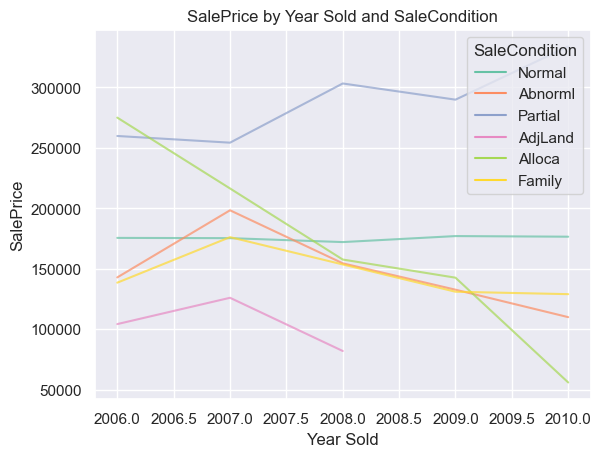

In [14]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.lineplot(x='YrSold', y='SalePrice', hue='SaleCondition', data=df_train, ci=None, estimator='mean', alpha=0.7)

plt.title("SalePrice by Year Sold and SaleCondition")
plt.xlabel("Year Sold")
plt.ylabel("SalePrice")

plt.show()

# Data Preprocessing Part 2

<AxesSubplot:>

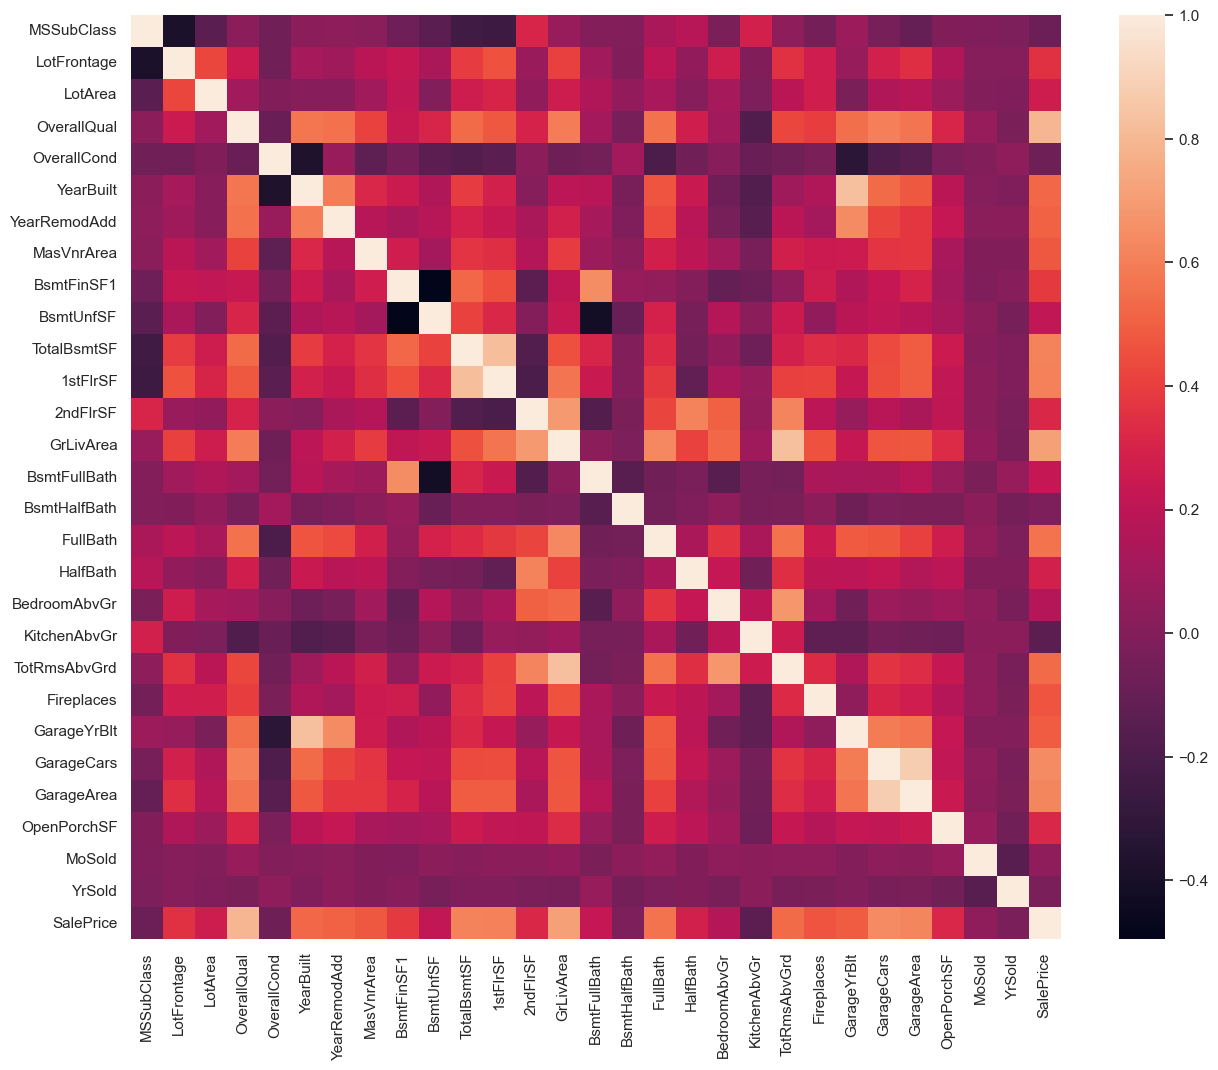

In [15]:
plt.figure(figsize=(15,12))
sns.heatmap(df_train.corr(), fmt='.2g')

In [16]:
df_train.select_dtypes(include='object').nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [17]:
df_train.drop(columns=['Neighborhood', 'Exterior1st', 'Exterior2nd', 'GarageQual', 'Condition2', 'BsmtFinType2', 'GarageFinish'], inplace=True)
df_train.shape

(1460, 60)

In [18]:
df_train.select_dtypes(include='object').nunique()

MSZoning         5
Street           2
LotShape         4
LandContour      4
Utilities        2
LotConfig        5
LandSlope        3
Condition1       9
BldgType         5
HouseStyle       8
RoofStyle        6
RoofMatl         8
MasVnrType       4
ExterQual        4
ExterCond        5
Foundation       6
BsmtQual         4
BsmtCond         4
BsmtExposure     4
BsmtFinType1     6
Heating          6
HeatingQC        5
CentralAir       2
Electrical       5
KitchenQual      4
Functional       7
GarageType       6
GarageCond       5
PavedDrive       3
SaleType         9
SaleCondition    6
dtype: int64

In [19]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df_train.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df_train[col].unique()}")

MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street: ['Pave' 'Grvl']
LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities: ['AllPub' 'NoSeWa']
LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope: ['Gtl' 'Mod' 'Sev']
Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl: ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
MasVnrType: ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
ExterQual: ['Gd' 'TA' 'Ex' 'Fa']
ExterCond: ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Foundation: ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
BsmtQual: ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond: ['TA' 'Gd' nan 'Fa' 'Po']
BsmtExposure: ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
Heating: ['GasA' 'GasW' 

In [20]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df_train.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df_train[col].unique())
    
    # Transform the column using the encoder
    df_train[col] = label_encoder.transform(df_train[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df_train[col].unique()}")

MSZoning: [3 4 0 1 2]
Street: [1 0]
LotShape: [3 0 1 2]
LandContour: [3 0 2 1]
Utilities: [0 1]
LotConfig: [4 2 0 1 3]
LandSlope: [0 1 2]
Condition1: [2 1 4 0 5 8 6 3 7]
BldgType: [0 1 2 4 3]
HouseStyle: [5 2 0 1 6 7 4 3]
RoofStyle: [1 3 2 4 0 5]
RoofMatl: [1 7 3 6 2 5 4 0]
MasVnrType: [1 2 3 0 4]
ExterQual: [2 3 0 1]
ExterCond: [4 2 1 3 0]
Foundation: [2 1 0 5 3 4]
BsmtQual: [2 3 0 4 1]
BsmtCond: [3 1 4 0 2]
BsmtExposure: [3 1 2 0 4]
BsmtFinType1: [2 0 5 4 1 6 3]
Heating: [1 2 3 5 4 0]
HeatingQC: [0 2 4 1 3]
CentralAir: [1 0]
Electrical: [4 1 0 2 3 5]
KitchenQual: [2 3 0 1]
Functional: [6 2 0 3 4 1 5]
GarageType: [1 5 3 4 6 2 0]
GarageCond: [4 1 5 2 3 0]
PavedDrive: [2 0 1]
SaleType: [8 6 0 3 4 1 5 2 7]
SaleCondition: [4 0 5 1 2 3]


In [21]:
df_train.dtypes

MSSubClass         int64
MSZoning           int32
LotFrontage      float64
LotArea            int64
Street             int32
LotShape           int32
LandContour        int32
Utilities          int32
LotConfig          int32
LandSlope          int32
Condition1         int32
BldgType           int32
HouseStyle         int32
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle          int32
RoofMatl           int32
MasVnrType         int32
MasVnrArea       float64
ExterQual          int32
ExterCond          int32
Foundation         int32
BsmtQual           int32
BsmtCond           int32
BsmtExposure       int32
BsmtFinType1       int32
BsmtFinSF1         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating            int32
HeatingQC          int32
CentralAir         int32
Electrical         int32
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64


In [22]:
check_missing = df_train.isnull().sum() * 100 / df_train.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
dtype: float64

In [23]:
df_train['LotFrontage'].fillna(int(df_train['LotFrontage'].mean()), inplace=True)
df_train['GarageYrBlt'].fillna(int(df_train['GarageYrBlt'].median()), inplace=True)
df_train['MasVnrArea'].fillna(int(df_train['MasVnrArea'].mean()), inplace=True)

<AxesSubplot:>

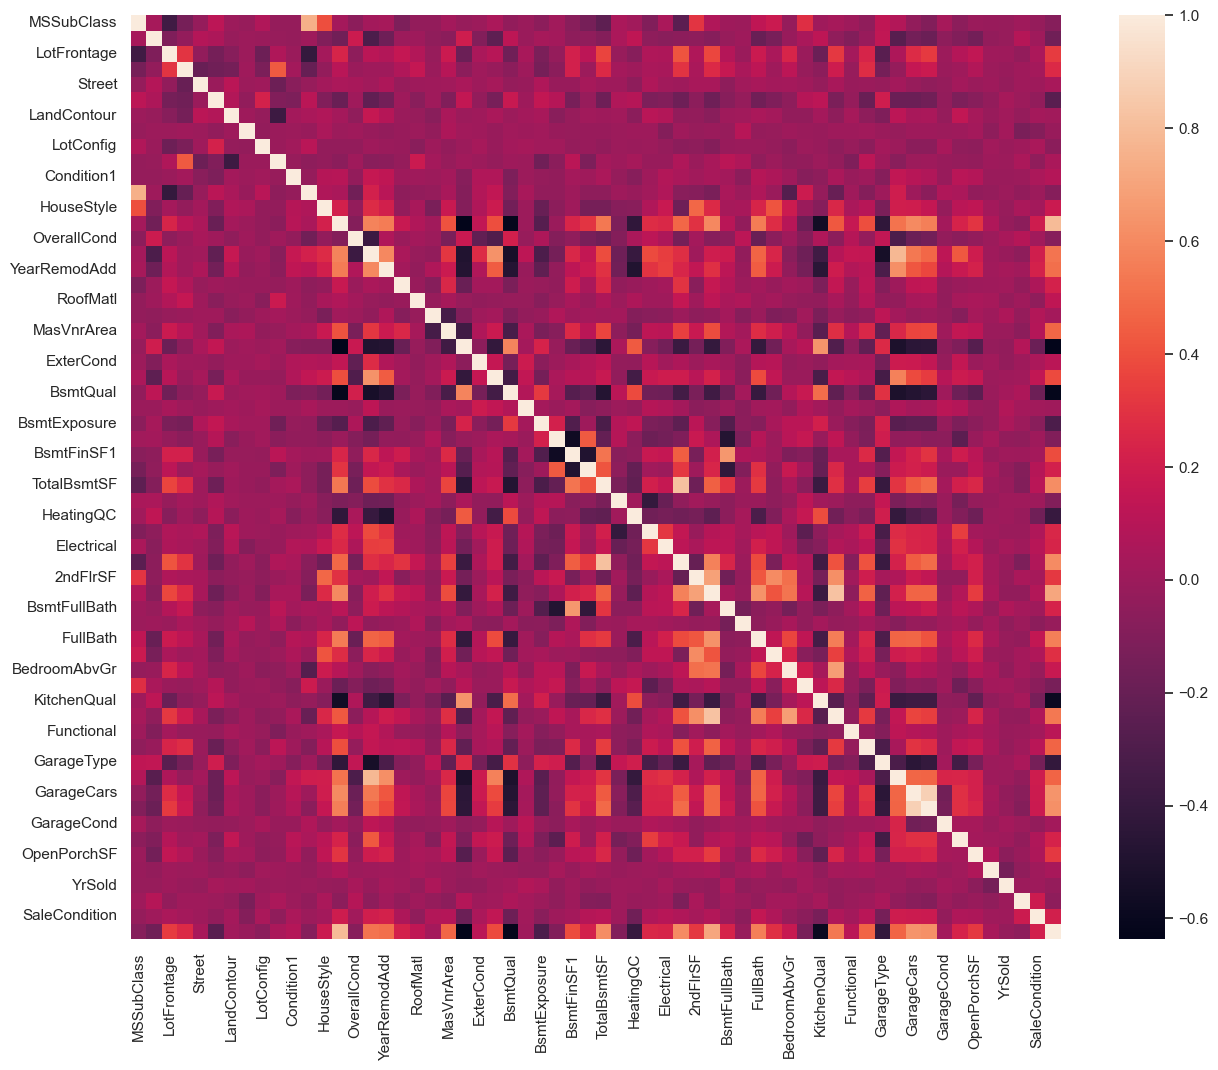

In [24]:
plt.figure(figsize=(15,12))
sns.heatmap(df_train.corr(), fmt='.2g')

# Machine Learning Model Building

In [25]:
X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

In [26]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# Decision Tree Regressor

In [27]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [28]:
from sklearn import metrics
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 26577.55821917808
MSE is 1850973548.7636986
R2 score is 0.7319702052011243
RMSE score is 43022.94212119504


# Random Forest Regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [30]:
from sklearn import metrics
import math
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 17639.670753424656
MSE is 1148293330.2881138
R2 score is 0.8337216510243429
RMSE score is 33886.47710057972


# AdaBoost Regressor

In [31]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(random_state=0)
ada.fit(X_train, y_train)

AdaBoostRegressor(random_state=0)

In [32]:
from sklearn import metrics
import math
y_pred = ada.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 23312.956411994714
MSE is 1582119004.9694018
R2 score is 0.7709016249677988
RMSE score is 39775.8595754938


# Feature Importances

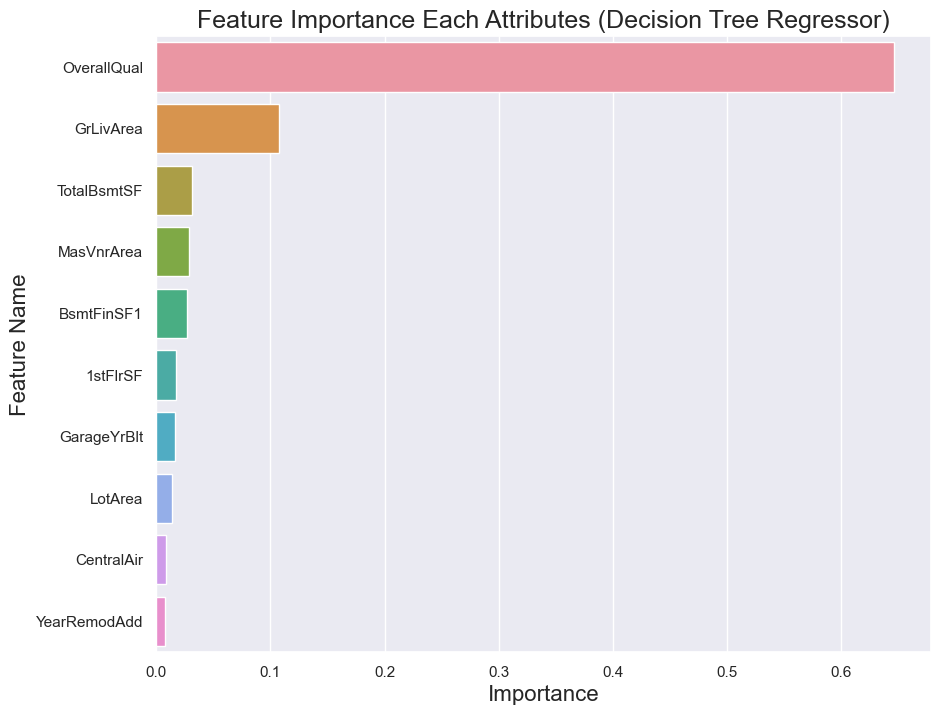

In [36]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

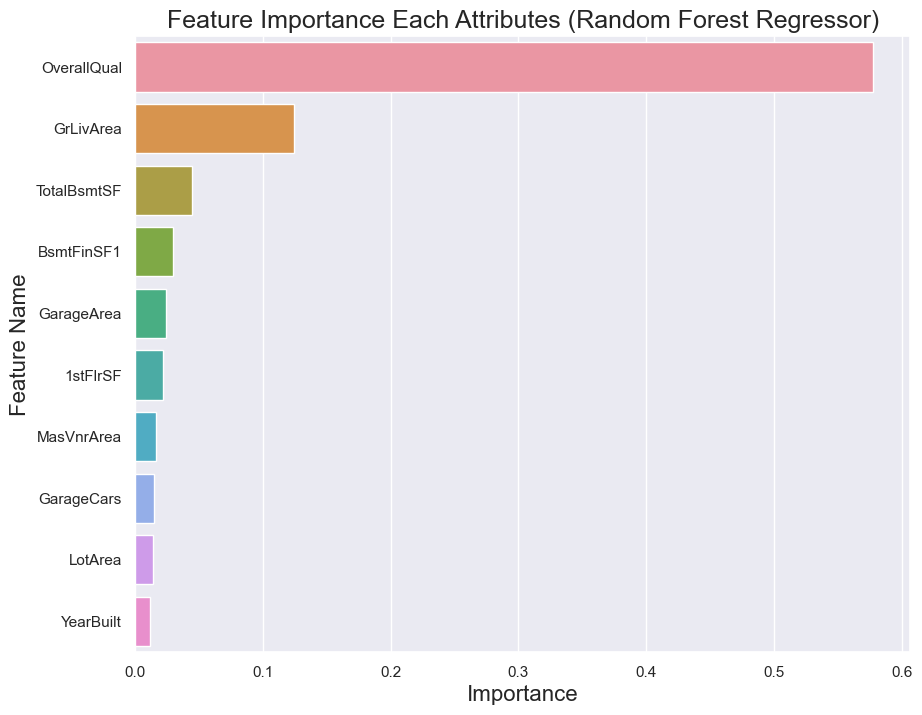

In [37]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rf.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()